# **Project Name**    - **Netflix Movies and TV Shows Clustering**







##### **Project Type**    - Unsupervised ML (Clustering)
##### **Contribution**    - Individual

# **Project Summary -**

Netflix, Inc., headquartered in Los Gatos, California, is a renowned American company that provides subscription-based streaming services. It was established in 1997 by Reed Hastings and Marc Randolph in Scotts Valley, California. Netflix boasts a vast library of films and television series, including those produced in-house under the banner of Netflix Originals.

In this project, I have accomplished the following tasks:

**1.** Conducted an Exploratory Data Analysis.
**2.** Analyzed the variety of content available across different countries.
**3.** Investigated whether Netflix has been shifting its focus towards **4.** TV shows over movies in recent years.
**5.** Clustered similar content by comparing text-based features.

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


This dataset, which includes TV shows and movies available on Netflix as of 2019, was sourced from Flixable, a third-party Netflix search engine.

An intriguing report released by Flixable in 2018 revealed that the number of TV shows on Netflix has nearly tripled since 2010. Conversely, the number of movies has decreased by more than 2,000 titles during the same period. This dataset presents an exciting opportunity to uncover additional insights.

Furthermore, integrating this dataset with other external datasets, such as IMDB ratings and Rotten Tomatoes scores, could lead to the discovery of even more fascinating findings.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Import Libraries
import numpy as np
import pandas as pd
from numpy import math
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
from matplotlib.pyplot import figure
import plotly.graph_objects as go
import plotly.offline as py
import plotly.express as px
from datetime import datetime

import warnings
warnings.filterwarnings('ignore')


### Dataset Loading

In [ ]:
# Load Dataset
#mounting the google drive to access the files
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
dataset = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/AlmaBetter Projects/6.Module6/NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv')

### Dataset First View

In [ ]:
# Dataset First Look
dataset.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
dataset.shape

(7787, 12)

### Dataset Information

In [ ]:
# Dataset Info
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
len(dataset[dataset.duplicated()])

0

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
print(dataset.isnull().sum())

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64


<Axes: >

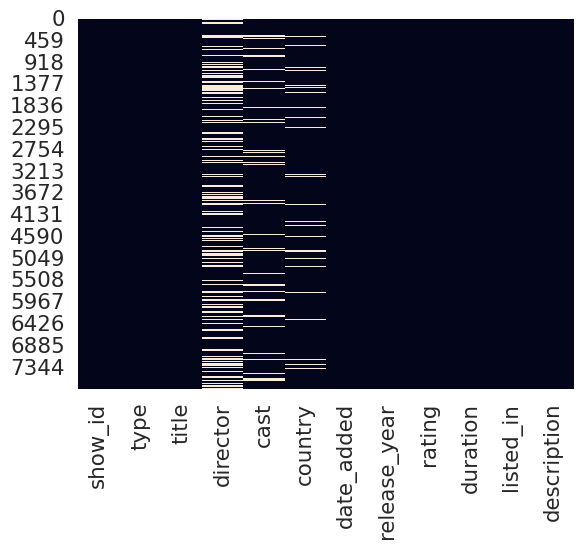

In [ ]:
# Visualizing the missing values
# Checking Null Value by plotting Heatmap
sns.heatmap(dataset.isnull(), cbar=False)

### What did you know about your dataset?

The dataset contains a total of 3631 null values. These are distributed across several columns: the director column has 2389 null values, the cast column has 718, the country column has 507, the date_added column has 10, and the rating column has 7. These null values need to be addressed appropriately.

## ***2. Understanding Your Variables***

In [ ]:
df = dataset.copy()

In [ ]:
# Dataset Columns
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [ ]:
# Dataset Describe
df.describe(include='all')

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
count,7787,7787,7787,5398,7069,7280,7777,7787.000000,7780,7787,7787,7787
unique,7787,2,7787,4049,6831,681,1565,NaN,14,216,492,7769
top,s1,Movie,3%,"Raúl Campos, Jan Suter",David Attenborough,United States,"January 1, 2020",NaN,TV-MA,1 Season,Documentaries,Multiple women report their husbands as missin...
freq,1,5377,1,18,18,2555,118,NaN,2863,1608,334,3
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.932580,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.757395,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1925.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018.000000,NaN,NaN,NaN,NaN


### Variables Description

**show_id :** This is a unique identifier for each Movie or TV Show.
**type :** This field distinguishes whether the content is a Movie or a TV Show.
**title :** This is the title of the Movie or TV Show.
**director :** This field lists the director of the Movie.
**cast :** This field lists the actors featured in the movie or show.
**country :** This field indicates the country where the movie or show was produced.
**date_added :** This is the date when the movie or show was added to Netflix.
**release_year :** This is the actual release year of the movie or show.
**rating :** This field provides the TV rating of the movie or show.
**duration :** This field indicates the total duration of the content, either in minutes (for movies) or number of seasons (for TV shows).
**listed_in :** This field lists the genre of the movie or show.
**description:** This field provides a summary description of the movie or show.

### Handling Missing Values

In [ ]:
#Handling Null Values
df['cast'].fillna(value='No cast',inplace=True)
df['country'].fillna(value=df['country'].mode()[0],inplace=True)

In [ ]:
#'date_added' and 'rating' contains an insignificant portion of the data so we will drop them from the dataset
df.dropna(subset=['date_added','rating'],inplace=True)

In [ ]:
#Dropping Director Column
df.drop(['director'],axis=1,inplace=True)

In [ ]:
#again checking is there any null values are not
df.isnull().sum()

show_id         0
type            0
title           0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

### Check Unique Values for each variable

In [ ]:
# Check Unique Values for each variable.
# Check Unique Values for each variable.
for i in df.columns.tolist():
  print("No. of unique values in ",i,"is",dataset[i].nunique(),".")

No. of unique values in  show_id is 7787 .
No. of unique values in  type is 2 .
No. of unique values in  title is 7787 .
No. of unique values in  cast is 6831 .
No. of unique values in  country is 681 .
No. of unique values in  date_added is 1565 .
No. of unique values in  release_year is 73 .
No. of unique values in  rating is 14 .
No. of unique values in  duration is 216 .
No. of unique values in  listed_in is 492 .
No. of unique values in  description is 7769 .


In [ ]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
show_id,7770,7770,s1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
type,7770,2,Movie,5372,NaN,NaN,NaN,NaN,NaN,NaN,NaN
title,7770,7770,3%,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cast,7770,6818,No cast,718,NaN,NaN,NaN,NaN,NaN,NaN,NaN
country,7770,681,United States,3051,NaN,NaN,NaN,NaN,NaN,NaN,NaN
date_added,7770,1563,"January 1, 2020",118,NaN,NaN,NaN,NaN,NaN,NaN,NaN
release_year,7770.0,NaN,NaN,NaN,2013.935393,8.764357,1925.0,2013.0,2017.0,2018.0,2021.0
rating,7770,14,TV-MA,2861,NaN,NaN,NaN,NaN,NaN,NaN,NaN
duration,7770,216,1 Season,1606,NaN,NaN,NaN,NaN,NaN,NaN,NaN
listed_in,7770,491,Documentaries,334,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
# Write your code to make your dataset analysis ready.
df.columns

Index(['show_id', 'type', 'title', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [ ]:
# 1. checking the variable type
df['type'].value_counts()

type
Movie      5372
TV Show    2398
Name: count, dtype: int64

In [ ]:
#2 Top 6 countries having more content in netflix
df['country'].value_counts()[:6]

country
United States     3051
India              923
United Kingdom     396
Japan              224
South Korea        183
Canada             177
Name: count, dtype: int64

In [ ]:
#3 Release year of the content
df['release_year'].value_counts()[:10]

release_year
2018    1120
2017    1010
2019     996
2016     881
2020     868
2015     536
2014     334
2013     265
2012     218
2010     171
Name: count, dtype: int64

In [ ]:
#4 checking the rating of the content
df['rating'].value_counts()

rating
TV-MA       2861
TV-14       1928
TV-PG        804
R            665
PG-13        386
TV-Y         279
TV-Y7        270
PG           247
TV-G         194
NR            83
G             39
TV-Y7-FV       6
UR             5
NC-17          3
Name: count, dtype: int64

In [ ]:
#5 checking the listed in (genre) of the content in netflix
df['listed_in'].value_counts()

listed_in
Documentaries                                                                      334
Stand-Up Comedy                                                                    321
Dramas, International Movies                                                       320
Comedies, Dramas, International Movies                                             243
Dramas, Independent Movies, International Movies                                   215
                                                                                  ... 
Anime Series, Crime TV Shows, TV Thrillers                                           1
Crime TV Shows, Romantic TV Shows, Spanish-Language TV Shows                         1
Crime TV Shows, International TV Shows, Reality TV                                   1
International Movies, Romantic Movies, Sci-Fi & Fantasy                              1
International TV Shows, Spanish-Language TV Shows, Stand-Up Comedy & Talk Shows      1
Name: count, Length: 491, dtype: 

### What all manipulations have you done and insights you found?

I did few maipulations on the data and observed the following : <br>
* Number of movies (5372) are more than TV shows (2398)
* United states , India and UK have maximum content in the netflix .
* More number of mlvies are released in 2017 and 2018 .
* Maximum ratings are given to TV-MA and TV-14 .
* Top 3 genre listed in netflix are Documentaries , Stand-Up Comedy and Dramas, International Movies .

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

In [ ]:
df1 = df.copy()

#### Chart - 1 - Count Plot on Type variable

In [ ]:
# Chart - 1 visualization code
df1['type'].value_counts()

type
Movie      5372
TV Show    2398
Name: count, dtype: int64

<Axes: xlabel='type', ylabel='count'>

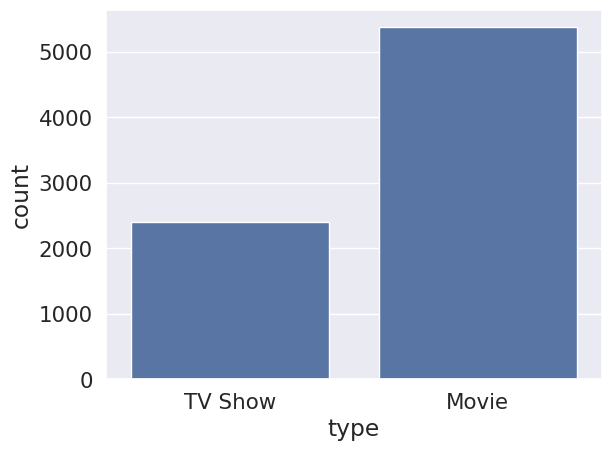

In [ ]:
#countplot to visualize the number of movies and tv_shows in type column
sns.countplot(x=df1['type'])

##### 1. Why did you pick the specific chart?

A countplot is a type of plot that tallies the number of occurrences for each category in a categorical variable, and visualizes these counts as bars. This is a quick and effective way to understand the distribution of data, and to spot any potential imbalances or biases. Furthermore, a countplot can group the counts of various categories and display them side-by-side, facilitating easy comparison of category frequencies. This feature is particularly useful when comparing the frequency of different categories within a dataset or between multiple datasets.

##### 2. What is/are the insight(s) found from the chart?

Netflix boasts a collection of 5372 movies and 2398 TV shows, indicating a higher quantity of movies compared to TV shows on the platform.

#### Chart - 2 - Count Plot on Rating with hue Target_ages

In [ ]:
# Chart - 2 visualization code
df1['rating'].value_counts()

rating
TV-MA       2861
TV-14       1928
TV-PG        804
R            665
PG-13        386
TV-Y         279
TV-Y7        270
PG           247
TV-G         194
NR            83
G             39
TV-Y7-FV       6
UR             5
NC-17          3
Name: count, dtype: int64

In [ ]:
#Assigning the Ratings into grouped categories
ratings = {
    'TV-PG': 'Older Kids',
    'TV-MA': 'Adults',
    'TV-Y7-FV': 'Older Kids',
    'TV-Y7': 'Older Kids',
    'TV-14': 'Teens',
    'R': 'Adults',
    'TV-Y': 'Kids',
    'NR': 'Adults',
    'PG-13': 'Teens',
    'TV-G': 'Kids',
    'PG': 'Older Kids',
    'G': 'Kids',
    'UR': 'Adults',
    'NC-17': 'Adults'
}

In [ ]:
df1['target_ages'] = df1['rating'].replace(ratings)
df1['target_ages'].value_counts()

target_ages
Adults        3617
Teens         2314
Older Kids    1327
Kids           512
Name: count, dtype: int64

In [ ]:
# type and target_ages should be categorical
df1['type'] = pd.Categorical(df1['type'])
df1['target_ages'] = pd.Categorical(df1['target_ages'], categories=['Kids', 'Older Kids', 'Teens', 'Adults'])

In [ ]:
df1.head(2)

,show_id,type,title,cast,country,date_added,release_year,rating,duration,listed_in,description,target_ages
0,s1,TV Show,3%,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,Adults
1,s2,Movie,7:19,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,Adults


In [ ]:
# create two extra columns
movies = df1[df1['type']=='Movie']
tv_shows = df1[df1['type']=='TV Show']
movies.shape[0] , tv_shows.shape[0]

(5372, 2398)

<Axes: xlabel='rating', ylabel='count'>

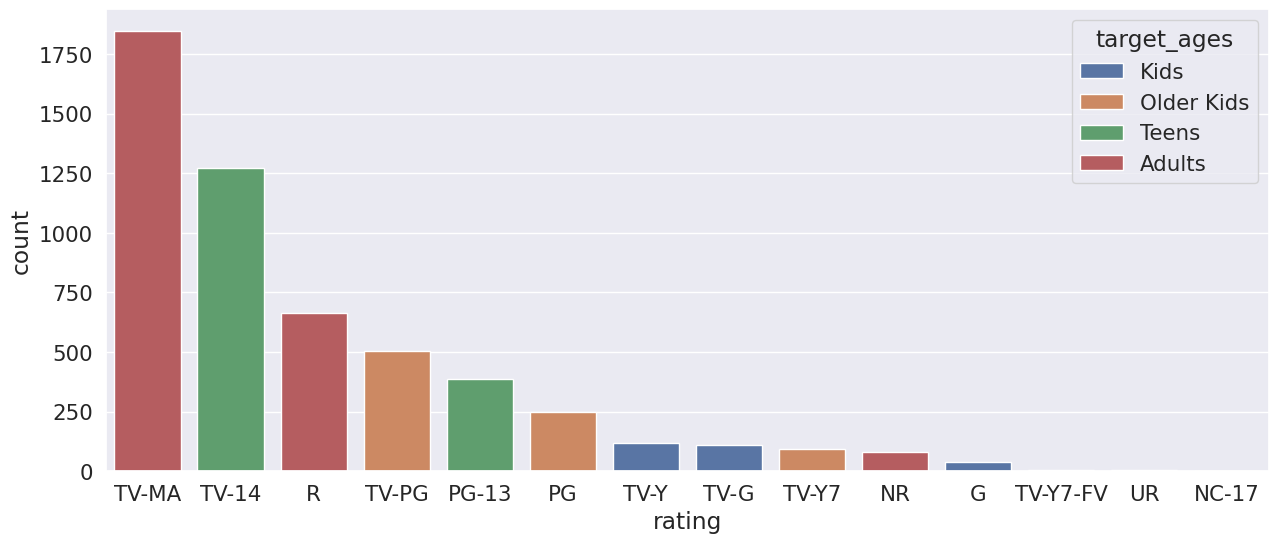

In [ ]:
plt.figure(figsize=(15,6))
sns.countplot(x=movies['rating'],hue=movies['target_ages'],order = movies['rating'].value_counts().index)

<Axes: xlabel='rating', ylabel='count'>

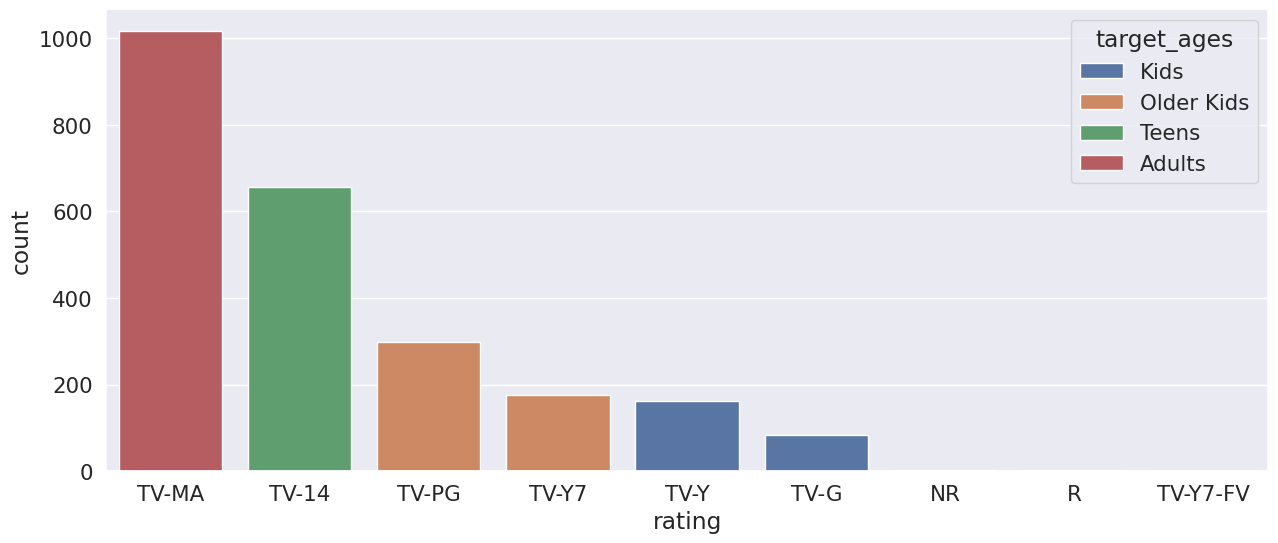

In [ ]:
plt.figure(figsize=(15,6))
sns.countplot(x=tv_shows['rating'],hue=tv_shows['target_ages'],order = tv_shows['rating'].value_counts().index)

##### 1. Why did you pick the specific chart?

countplot can count the number of occurrences of each category in a categorical variable and plot the counts as bars. This can help you quickly understand the distribution of the data and identify any imbalances or biases. countplot can also group the counts of different categories and plot them side-by-side, which allows you to compare the frequencies of different categories easily. This is useful when you want to compare the frequency of different categories across a dataset or between different datasets.

##### 2. What is/are the insight(s) found from the chart?

The rating TV-MA, which is intended for adults, has the highest frequency for TV shows. In other words, TV-MA holds the majority of ratings in both scenarios.

#### Chart - 3 - Plot and Count Plot on Release_Year

In [ ]:
# Chart - 3 visualization code
movies_year = movies['release_year'].value_counts().sort_index(ascending=False)
tv_shows_year = tv_shows['release_year'].value_counts().sort_index(ascending=False)

Text(0.5, 1.02, 'Production growth yearly')

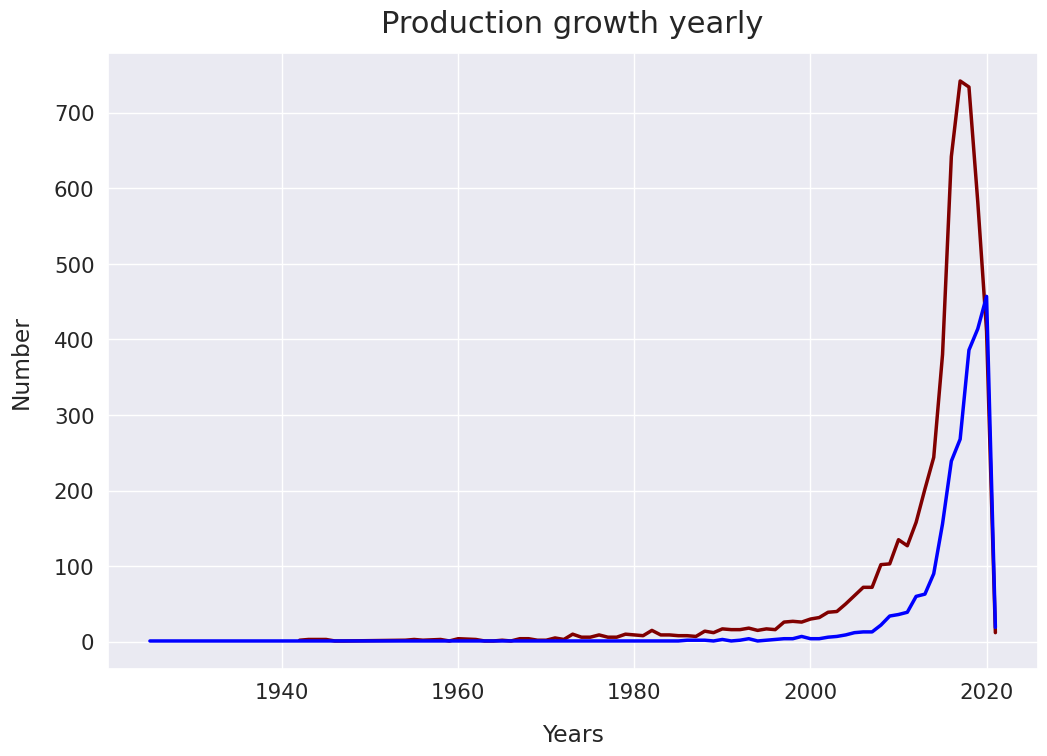

In [ ]:
# visualizing the movies and tv_shows based on the release year
sns.set(font_scale=1.4)
movies_year.plot(figsize=(12, 8), linewidth=2.5, color='maroon',label="Movies / year",ms=3)
tv_shows_year.plot(figsize=(12, 8), linewidth=2.5, color='blue',label="TV Shows / year")
plt.xlabel("Years", labelpad=15)
plt.ylabel("Number", labelpad=15)
plt.title("Production growth yearly", y=1.02, fontsize=22)

<Axes: xlabel='count', ylabel='release_year'>

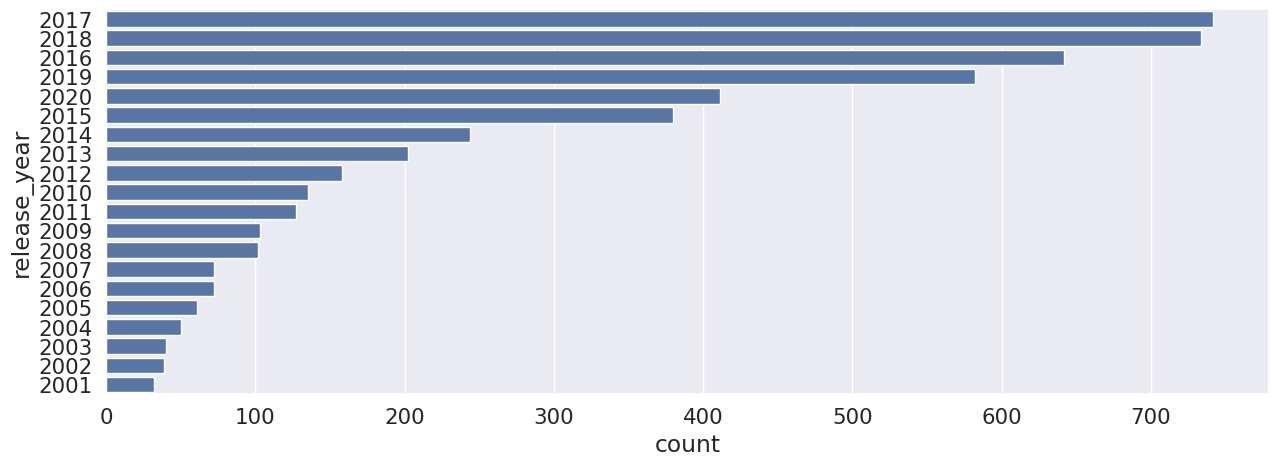

In [ ]:
#Analysing how many movies released per year in last 20 years
plt.figure(figsize=(15,5))
sns.countplot(y=movies['release_year'],data=df1,order=movies['release_year'].value_counts().index[0:20])

<Axes: xlabel='count', ylabel='release_year'>

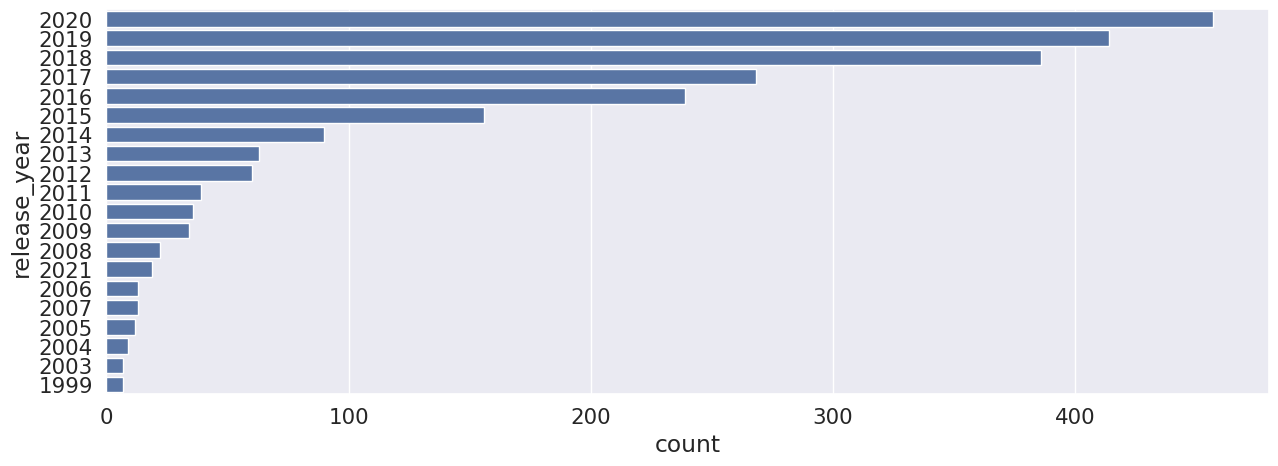

In [ ]:
#Analysing how many movies released per year in last 15 years
plt.figure(figsize=(15,5))
sns.countplot(y=tv_shows['release_year'],data=df1,order=tv_shows['release_year'].value_counts().index[0:20])

##### 1. Why did you pick the specific chart?

A countplot is a graphical tool that enumerates the number of occurrences for each category in a categorical variable, and represents these counts as bars. It provides a quick way to understand data distribution and to spot any potential imbalances or biases. Additionally, a countplot can group the counts of various categories and display them adjacently, enabling easy comparison of category frequencies. This becomes particularly useful when you aim to compare the frequency of different categories within a dataset or across multiple datasets.

##### 2. What is/are the insight(s) found from the chart?

**1.** The maximum number of movies were released in the years 2017 and 2018.
**2.** The year 2020 saw the highest release of movies.
**3.** The growth rate of movies on Netflix is significantly higher than that of TV shows.
**4.** A substantial increase in the number of movies and television episodes was observed post-2015.
**5.** There was a noticeable decline in the production of movies and television episodes after 2020.
**6.** It seems that Netflix has prioritized the augmentation of Movie content over TV Shows, as evidenced by the more dramatic increase in the number of movies.

#### Chart - 4 - Count Plot on Month

In [ ]:
# Chart - 4 visualization code
#adding columns of month and year of addition

df1['month'] = pd.DatetimeIndex(df1['date_added']).month
df1.head()

,show_id,type,title,cast,country,date_added,release_year,rating,duration,listed_in,description,target_ages,month
0,s1,TV Show,3%,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,Adults,8
1,s2,Movie,7:19,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,Adults,12
2,s3,Movie,23:59,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",Adults,12
3,s4,Movie,9,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",Teens,11
4,s5,Movie,21,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,Teens,1


<Axes: xlabel='month', ylabel='count'>

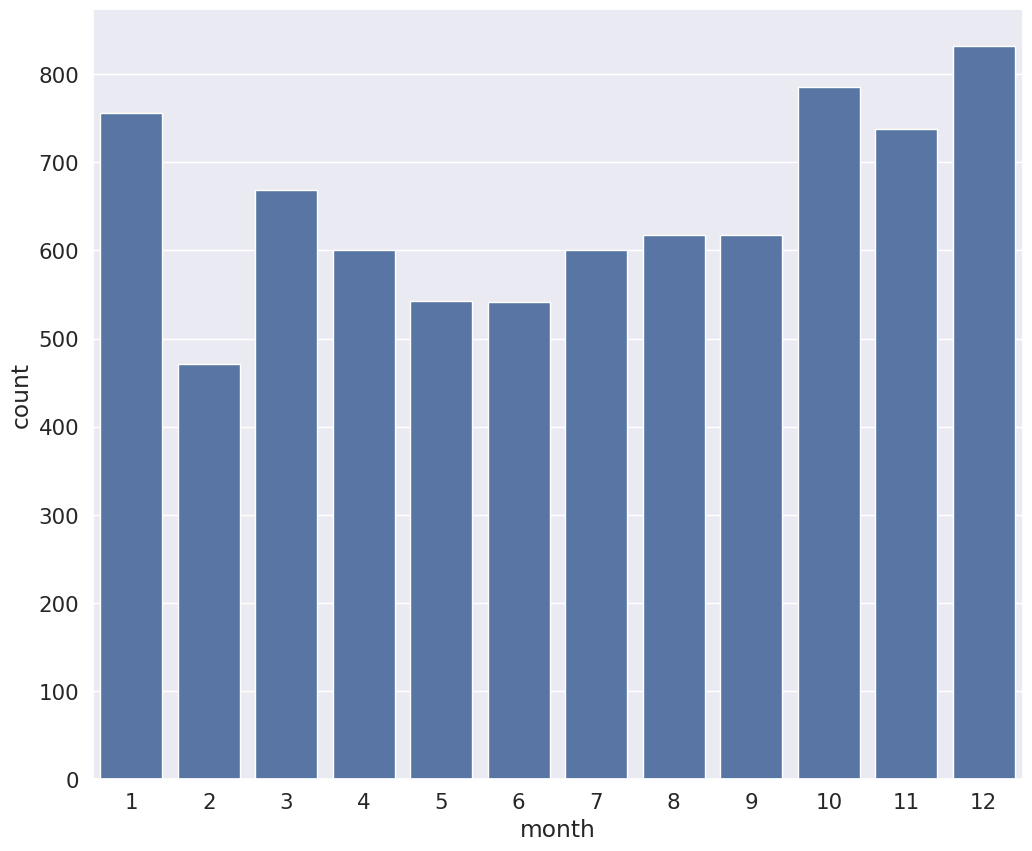

In [ ]:
# Plotting the Countplot
plt.figure(figsize=(12,10))
sns.countplot(x= df1['month'])

<Axes: xlabel='month', ylabel='count'>

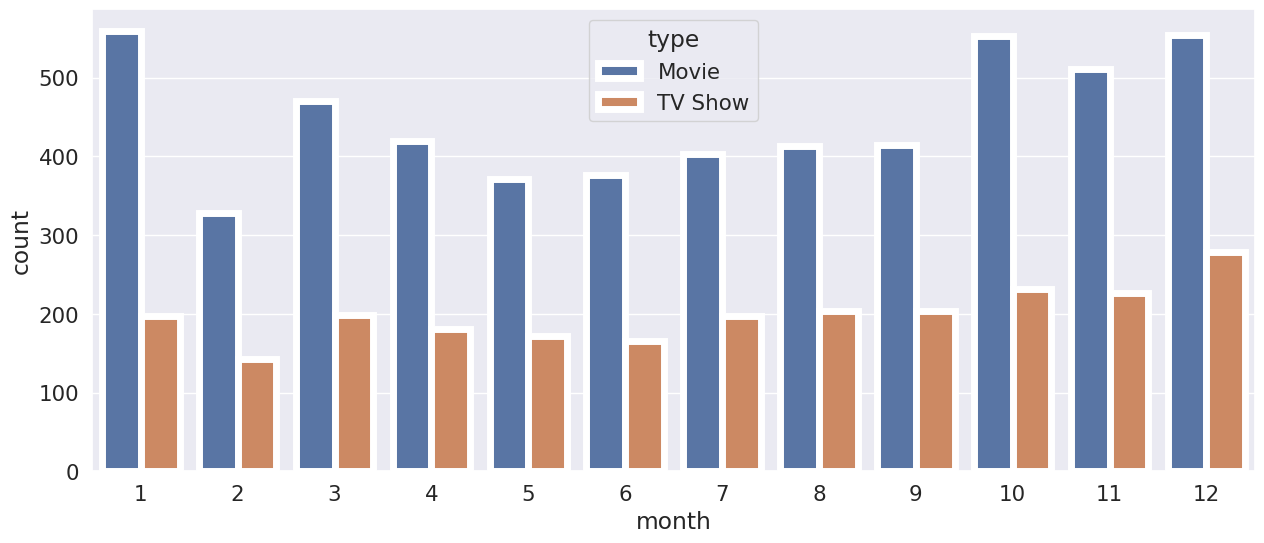

In [ ]:
fig, ax = plt.subplots(figsize=(15,6))

sns.countplot(x='month', hue='type',lw=5, data=df1, ax=ax)

##### 1. Why did you pick the specific chart?

A countplot is a graphical tool that enumerates the frequency of each category in a categorical variable, and represents these frequencies as bars. It provides a rapid way to comprehend data distribution and to identify any potential imbalances or biases. Moreover, a countplot can group the frequencies of various categories and display them adjacently, facilitating easy comparison of category frequencies. This is particularly beneficial when you aim to compare the frequency of different categories within a dataset or across multiple datasets.

##### 2. What is/are the insight(s) found from the chart?

**1.** The period from October to January sees the highest addition of movies and TV shows.
**2.** The graph indicates that the most substantial influx of content to Netflix occurs from October through January.

#### Chart - 5 - Count Plot on Listed_In (Genre)

<Axes: title={'center': 'Top10 Genre of Movies'}, xlabel='count', ylabel='listed_in'>

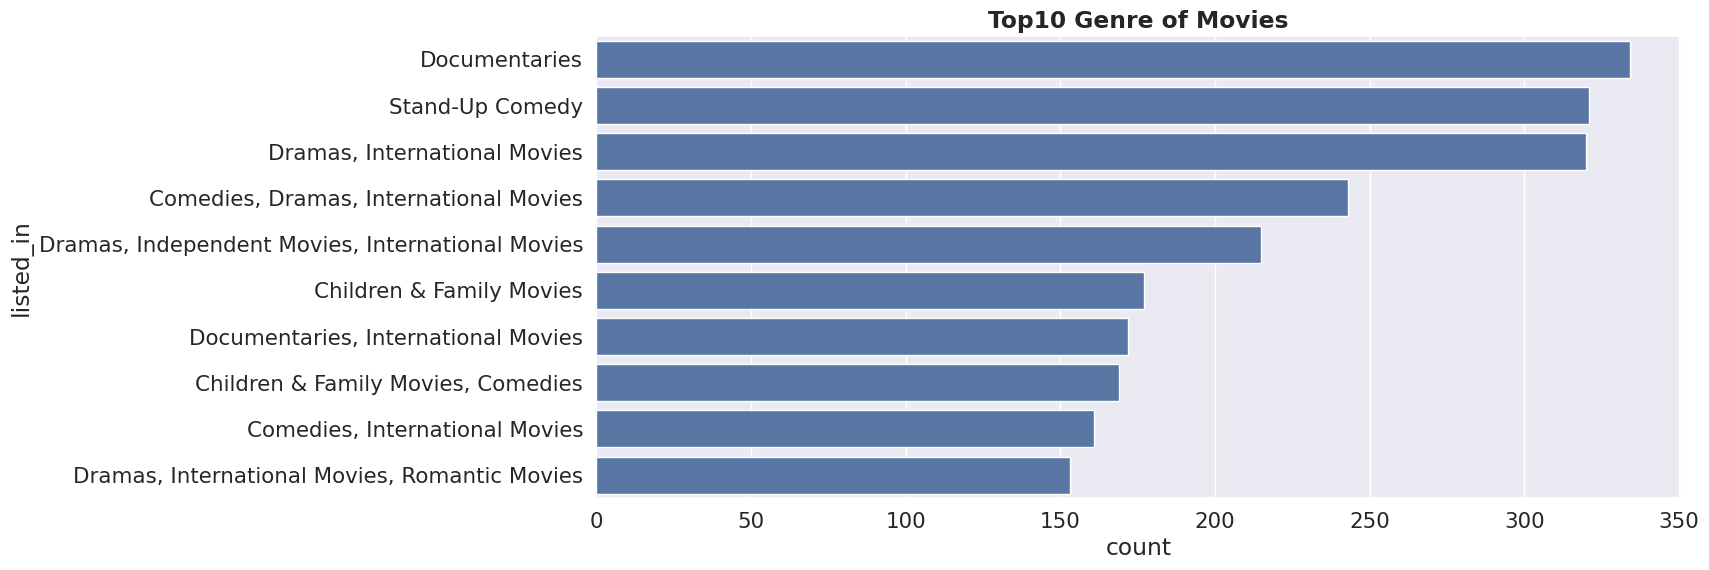

In [ ]:
# Chart - 5 visualization code

#Analysing top10 genre of the movies
plt.figure(figsize=(14,6))
plt.title('Top10 Genre of Movies',fontweight="bold")
sns.countplot(y=movies['listed_in'],data=movies,order=movies['listed_in'].value_counts().index[0:10])

<Axes: title={'center': 'Top10 Genre of TV Shows'}, xlabel='count', ylabel='listed_in'>

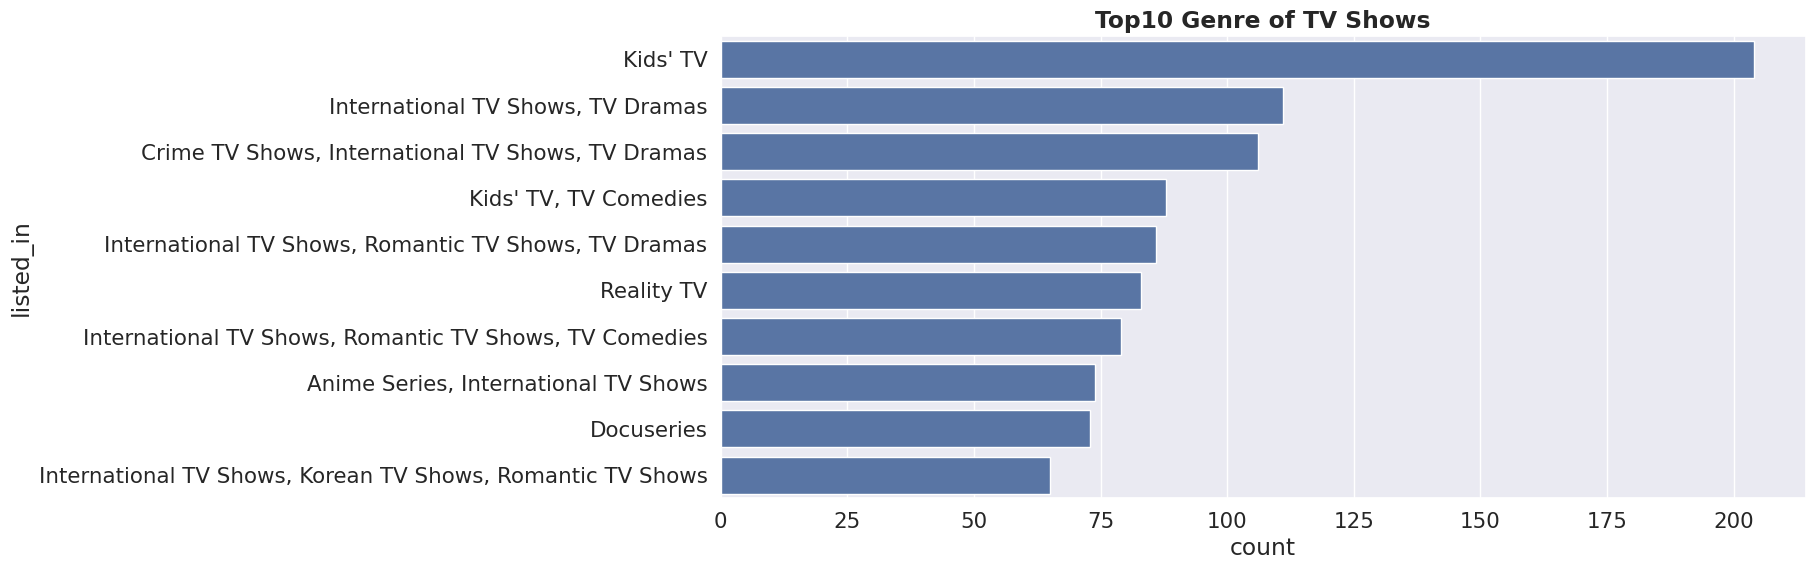

In [ ]:
#Analysing top10 genres of TVSHOWS
plt.figure(figsize=(14,6))
plt.title('Top10 Genre of TV Shows',fontweight="bold")
sns.countplot(y=tv_shows['listed_in'],data=tv_shows,order=tv_shows['listed_in'].value_counts().index[0:10])

##### 1. Why did you pick the specific chart?

A bar chart is a useful tool when you aim to display a distribution of data points or compare metric values across various subgroups of your data. It allows us to identify which groups are most prevalent or highest, and how other groups stack up against them. Similarly, a countplot can enumerate the occurrences of each category in a categorical variable and represent these counts as bars. This aids in quickly comprehending the data distribution and spotting any potential imbalances or biases. A countplot can also group the counts of different categories and display them side-by-side, facilitating an easy comparison of category frequencies. This is particularly beneficial when comparing the frequency of different categories within a dataset or across multiple datasets.

##### 2. What is/are the insight(s) found from the chart?

Documentaries lead the pack as the most prevalent genre on Netflix, followed by stand-up comedy, dramas, and international movies. When it comes to TV shows, Kids TV holds the top spot in terms of genre on Netflix.

#### Chart - 6 - Dist Plot , Count Plot and Bar Plot on Duration .



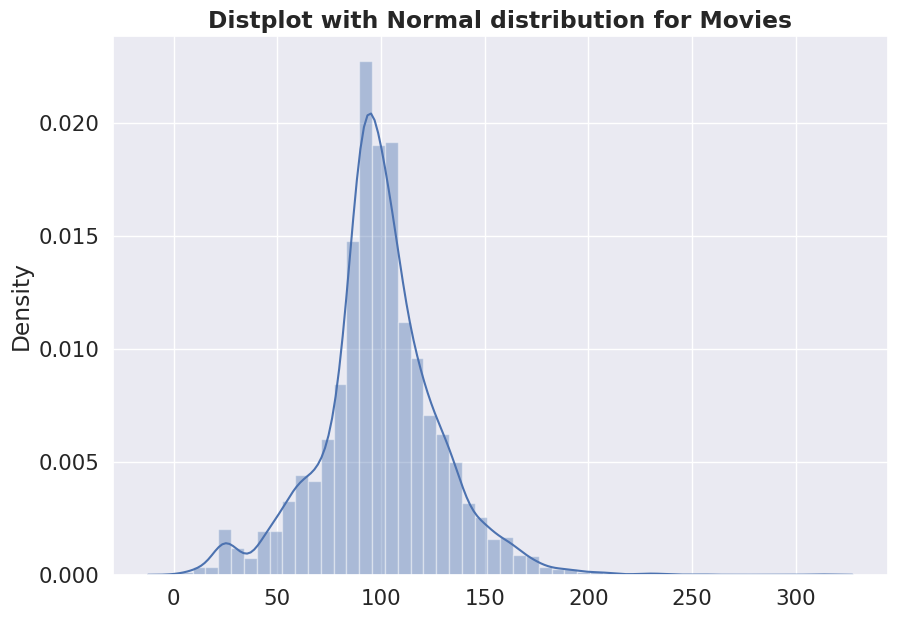

In [ ]:
# Chart - 6 visualization code
#Checking the distribution of Movie Durations
plt.figure(figsize=(10,7))
#Regular Expression pattern \d is a regex pattern for digit + is a regex pattern for at leas
sns.distplot(movies['duration'].str.extract('(\d+)'))
plt.title('Distplot with Normal distribution for Movies',fontweight="bold")
plt.show()

<Axes: title={'center': 'Distribution of TV Shows duration'}, xlabel='duration', ylabel='count'>

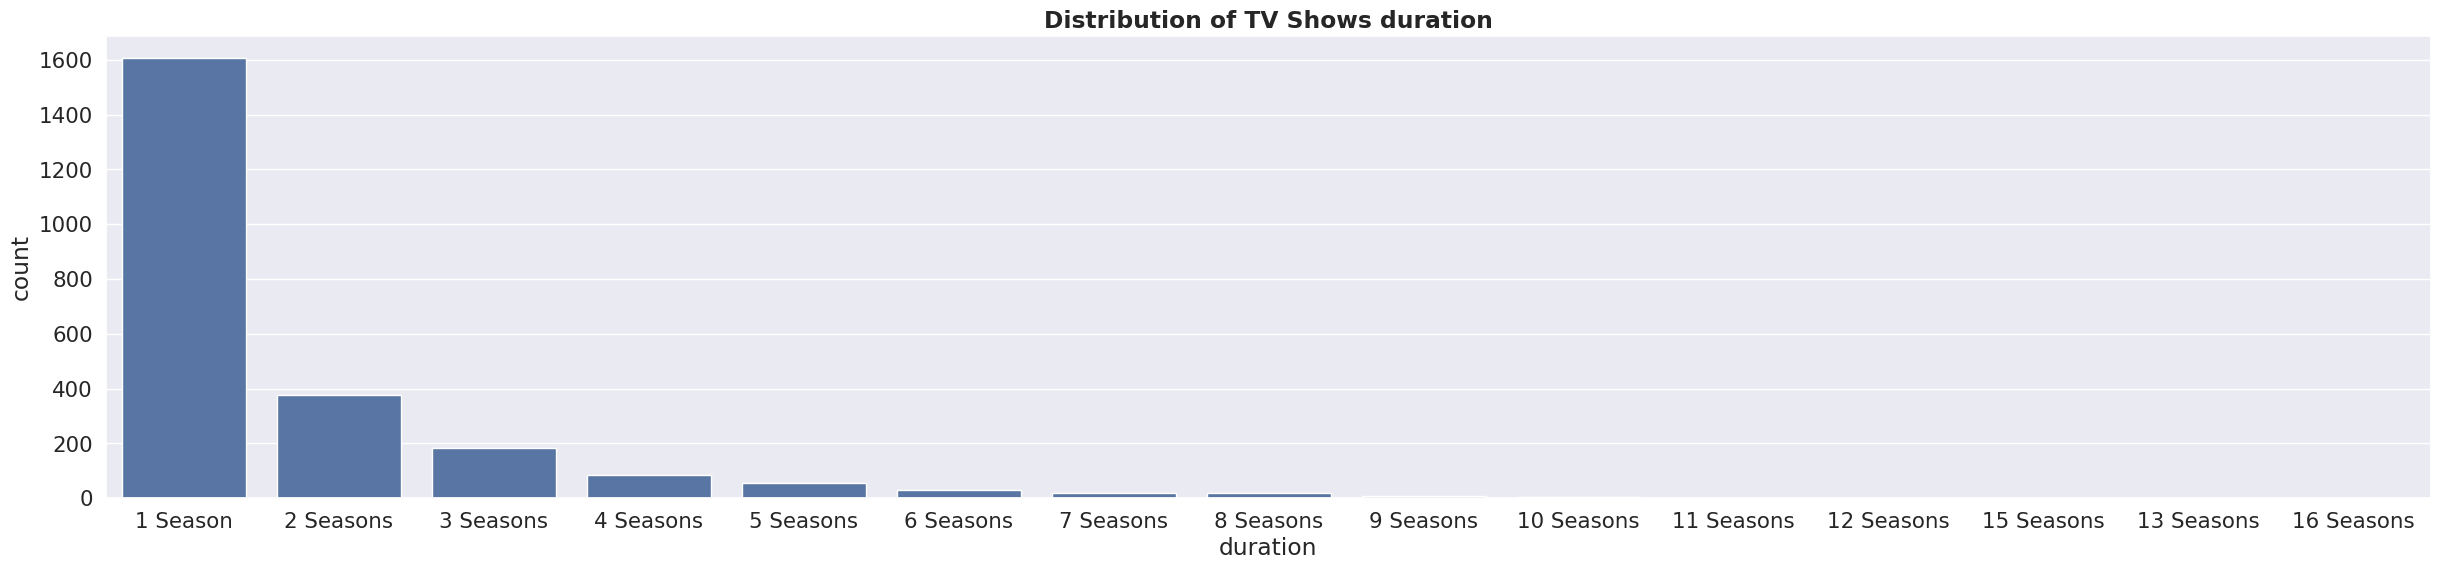

In [ ]:
#Checking the distribution of TV SHOWS
plt.figure(figsize=(30,6))
plt.title("Distribution of TV Shows duration",fontweight='bold')
sns.countplot(x=tv_shows['duration'],data=tv_shows,order = tv_shows['duration'].value_counts().index)

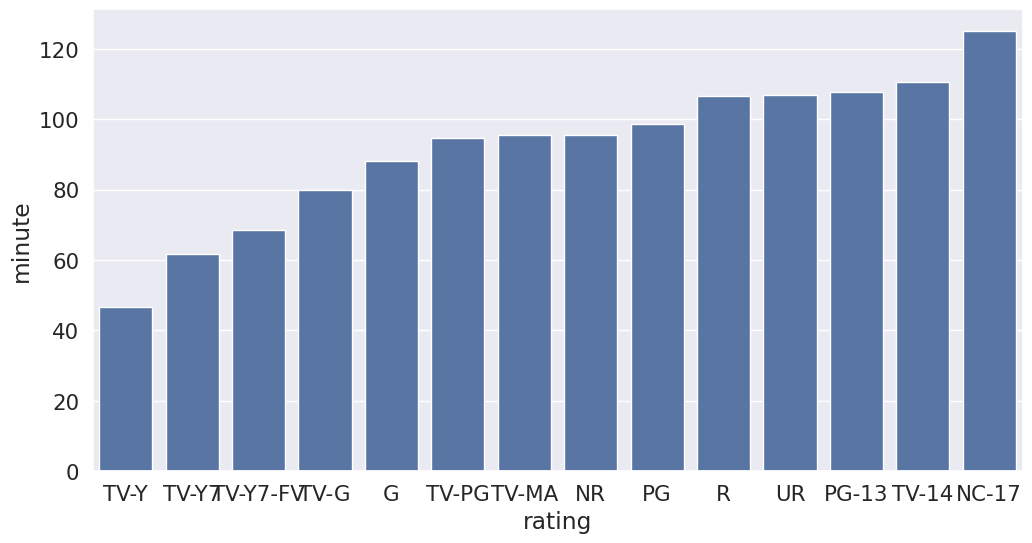

In [ ]:
movies['minute'] = movies['duration'].str.extract('(\d+)').apply(pd.to_numeric)
duration_year = movies.groupby(['rating'])['minute'].mean()
duration_df=pd.DataFrame(duration_year).sort_values('minute')
plt.figure(figsize=(12,6))
ax=sns.barplot(x=duration_df.index, y=duration_df.minute)

##### 1. Why did you pick the specific chart?

A Distplot is capable of plotting the distribution of a continuous variable. This can swiftly aid in understanding the shape of the distribution, such as its symmetry or skewness, and the location of the central tendency, like the mean or median.
A Bar graph is utilized to compare items across different groups over time. It is particularly useful in tracking changes over a specified period.
A Countplot can enumerate the occurrences of each category in a categorical variable and represent these counts as bars. This can expedite the understanding of data distribution and identification of any imbalances or biases. Furthermore, a Countplot can group the counts of different categories and display them side-by-side, facilitating an easy comparison of category frequencies. This is especially beneficial when comparing the frequency of different categories within a dataset or across multiple datasets.

##### 2. What is/are the insight(s) found from the chart?

**1.** The majority of movies on the platform have a duration ranging from 50 to 150 minutes.
**2.** The highest number of TV shows on Netflix consist of just one season.
**3.** Movies with an NC-17 rating tend to have the longest average duration.
Conversely, movies with a TV-Y rating typically have the shortest average runtime.

#### Chart - 7 - Count Plot on Country with hue Type and Heatmap on Country with hue Target_Ages

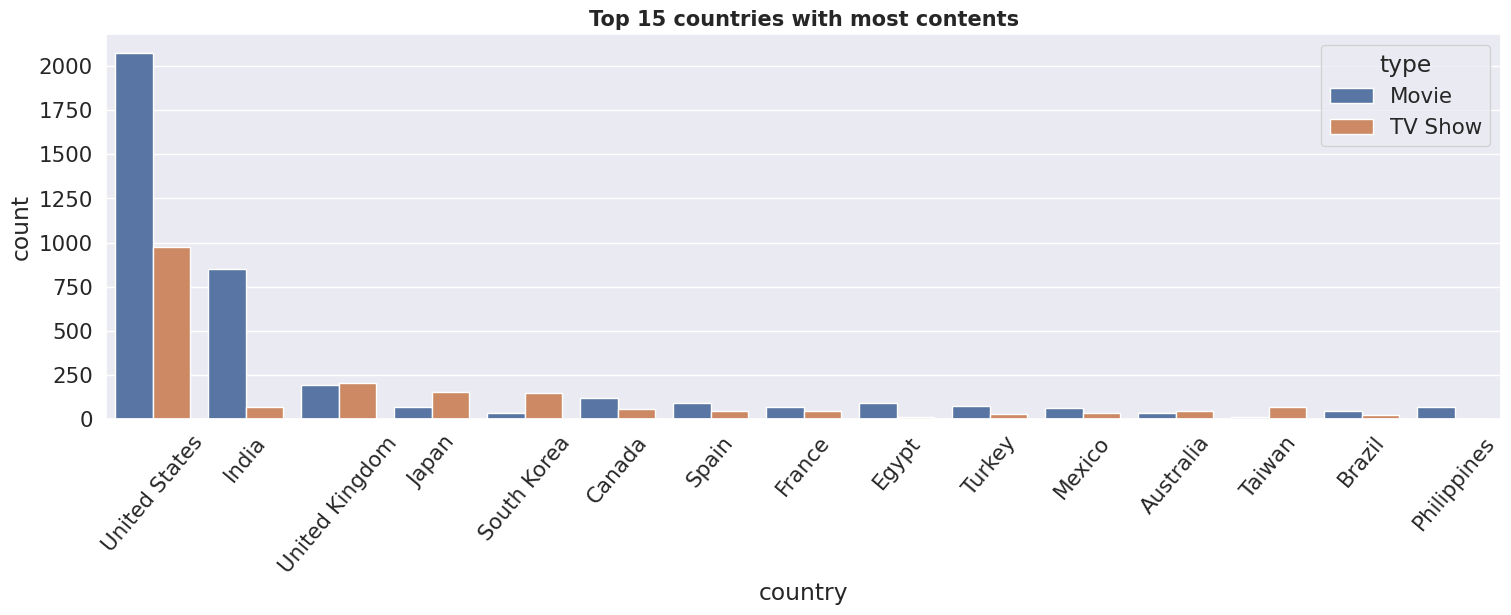

In [ ]:
# Chart - 7 visualization code

# Analysisng top 15 countries with most content
plt.figure(figsize=(18,5))
sns.countplot(x=df1['country'],hue=df1['type'],order=df1['country'].value_counts().index[0:15])
plt.xticks(rotation=50)
plt.title('Top 15 countries with most contents', fontsize=15, fontweight='bold')
plt.show()

In [ ]:
country_order = df1['country'].value_counts()[:11].index
country_order

Index(['United States', 'India', 'United Kingdom', 'Japan', 'South Korea',
       'Canada', 'Spain', 'France', 'Egypt', 'Turkey', 'Mexico'],
      dtype='object', name='country')

In [ ]:
content_data = df1[['type','country']].groupby('country')['type'].value_counts().unstack().loc[country_order]
content_data['sum'] = content_data.sum(axis=1)
content_data.T

country,United States,India,United Kingdom,Japan,South Korea,Canada,Spain,France,Egypt,Turkey,Mexico
type,,,,,,,,,,,
Movie,2076,852,193,69,36,118,89,69,89,73,65
TV Show,975,71,203,155,147,59,45,46,12,27,35
sum,3051,923,396,224,183,177,134,115,101,100,100


In [ ]:
# Preparing data for heatmap
df1['count'] = 1
data = df1.groupby('country')['count'].sum().sort_values(ascending=False).reset_index()[:10]
top_countries = data['country']

df_heatmap = df1.loc[df1['country'].isin(top_countries)]
df_heatmap = pd.crosstab(df_heatmap['country'], df_heatmap['target_ages'], normalize='index').T
df_heatmap


country,Canada,Egypt,France,India,Japan,Mexico,South Korea,Spain,United Kingdom,United States
target_ages,,,,,,,,,,
Kids,0.180791,0.000000,0.095652,0.016251,0.008929,0.02,0.027322,0.022388,0.093434,0.089479
Older Kids,0.225989,0.039604,0.060870,0.160347,0.272321,0.07,0.120219,0.044776,0.204545,0.195346
Teens,0.146893,0.683168,0.165217,0.567714,0.352679,0.14,0.382514,0.097015,0.189394,0.243199
Adults,0.446328,0.277228,0.678261,0.255688,0.366071,0.77,0.469945,0.835821,0.512626,0.471976


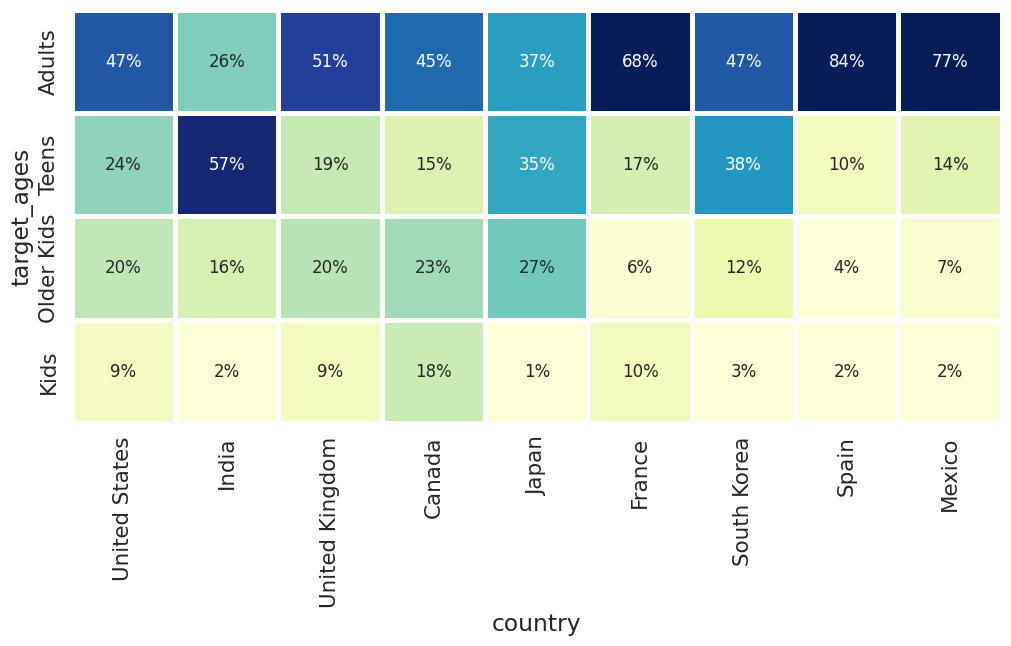

In [ ]:
# Plotting the heatmap
fig, ax = plt.subplots(1, 1, figsize=(12, 12))

country_order2 = ['United States', 'India', 'United Kingdom', 'Canada', 'Japan', 'France', 'South Korea', 'Spain',
       'Mexico']

age_order = ['Adults', 'Teens', 'Older Kids', 'Kids']

sns.heatmap(df_heatmap.loc[age_order,country_order2],cmap="YlGnBu",square=True, linewidth=2.5,cbar=False,
            annot=True,fmt='1.0%',vmax=.6,vmin=0.05,ax=ax,annot_kws={"fontsize":12})
plt.show()

##### 1. Why did you pick the specific chart?

A countplot is a type of plot that tallies the occurrences of each category in a categorical variable, and visualizes these counts as bars. This can expedite the understanding of data distribution and the identification of any potential imbalances or biases. Furthermore, a countplot can group the counts of different categories and display them side-by-side, facilitating an easy comparison of category frequencies. This is particularly beneficial when comparing the frequency of different categories within a dataset or across multiple datasets.

On the other hand, heatmaps are a powerful tool that allow for the quick identification of patterns and trends in your data. They make it easier to pinpoint areas of interest or potential issues.

##### 2. What is/are the insight(s) found from the chart?

**1.** The United States leads in terms of the volume of content available on Netflix, with India following closely behind.
**2.** The target age demographics for Netflix content in the US and UK show a close alignment, but they differ significantly from those in countries like India or Japan.
**3.** Interestingly, Mexico and Spain exhibit similar patterns in Netflix content for various age groups.

#### Chart - 8 - Pie Chart on Originals

In [ ]:
# Chart - 8 visualization code
df1['date_added'] = pd.to_datetime(df1['date_added'], errors='coerce')
df1['year_added'] = df1['date_added'].dt.year
df1


,show_id,type,title,cast,country,date_added,release_year,rating,duration,listed_in,description,target_ages,month,count,year_added
0,s1,TV Show,3%,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,Adults,8,1,2020.0
1,s2,Movie,7:19,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,Adults,12,1,2016.0
2,s3,Movie,23:59,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",Adults,12,1,2018.0
3,s4,Movie,9,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2017-11-16,2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",Teens,11,1,2017.0
4,s5,Movie,21,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020-01-01,2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,Teens,1,1,2020.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7782,s7783,Movie,Zozo,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...",2020-10-19,2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...,Adults,10,1,2020.0
7783,s7784,Movie,Zubaan,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,2019-03-02,2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...,Teens,3,1,2019.0
7784,s7785,Movie,Zulu Man in Japan,Nasty C,United States,2020-09-25,2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast...",Adults,9,1,2020.0
7785,s7786,TV Show,Zumbo's Just Desserts,"Adriano Zumbo, Rachel Khoo",Australia,2020-10-31,2019,TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...,Older Kids,10,1,2020.0


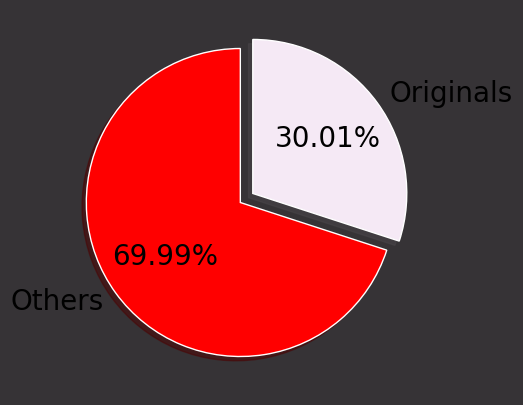

In [ ]:
# Ensure movies DataFrame has the date_added column and add year_added
movies['date_added'] = pd.to_datetime(movies['date_added'], errors='coerce')
movies['year_added'] = movies['date_added'].dt.year

# Create the originals column
movies['originals'] = np.where(movies['release_year'] == movies['year_added'], 'Yes', 'No')

# Pie plot showing percentage of originals and others in movies
fig, ax = plt.subplots(figsize=(5,5), facecolor="#363336")
ax.patch.set_facecolor('#363336')
explode = (0, 0.1)
ax.pie(movies['originals'].value_counts(), explode=explode, autopct='%.2f%%', labels=['Others', 'Originals'],
       shadow=True, startangle=90, textprops={'color': "black", 'fontsize': 20}, colors=['red', '#F5E9F5'])
plt.show()


##### 1. Why did you pick the specific chart?

Pie charts are utilized to depict proportional or relative data within a single chart. The idea of pie slices is employed to represent the percentage of a specific data point in relation to the whole.

Consequently, I used a pie chart to illustrate the percentage of people who opted for an international plan, with different colors denoting distinct areas within the circle.

##### 2. What is/are the insight(s) found from the chart?

**1.** 30% of the movies on Netflix were released directly on the platform.
**2.** Conversely, 70% of the movies added to Netflix had been previously released through different mediums.

## ***5. Hypothesis Testing***

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

**1.** Null Hypothesis (H0): Movies rated for kids and older kids have a duration of at least two hours.
**2.** Alternative Hypothesis (H1): Movies rated for kids and older kids do not have a duration of at least two hours.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value
#filtering movie from Type_of_show column
df_hypothesis = df1[df1["type"] == "Movie"]

In [ ]:
df_hypothesis['duration']= df_hypothesis['duration'].str.extract('(\d+)')
df_hypothesis['duration'] = pd.to_numeric(df_hypothesis['duration'])

In [ ]:
#group_by duration and target_ages
group_by_= df_hypothesis[['duration','target_ages']].groupby(by='target_ages')
#mean of group_by variable
group=group_by_.mean().reset_index()
group

,target_ages,duration
0,Kids,66.486891
1,Older Kids,92.024648
2,Teens,110.025332
3,Adults,98.275145


In [ ]:
# Grouping values
A = group_by_.get_group('Kids')
B = group_by_.get_group('Older Kids')

# Select only numerical columns
numeric_cols = A.select_dtypes(include='number').columns

# Mean and std calculation for kids and older kids variables
M1 = A[numeric_cols].mean()
S1 = A[numeric_cols].std()

M2 = B[numeric_cols].mean()
S2 = B[numeric_cols].std()

print('Mean for movies rated for Kids:\n{}\n'.format(M1))
print('Mean for movies rated for Older Kids:\n{}\n'.format(M2))
print('Std for movies rated for Kids:\n{}\n'.format(S1))
print('Std for movies rated for Older Kids:\n{}\n'.format(S2))


Mean for movies rated for Kids:
duration    66.486891
dtype: float64

Mean for movies rated for Older Kids:
duration    92.024648
dtype: float64

Std for movies rated for Kids:
duration    31.739465
dtype: float64

Std for movies rated for Older Kids:
duration    31.182577
dtype: float64



In [ ]:
#import stats
from scipy import stats
#length of groups and DOF
n1 = len(A)
n2= len(B)
print(n1,n2)

dof = n1+n2-2
print('dof',dof)

sp_2 = ((n2-1)*S1**2  + (n1-1)*S2**2) / dof
print('SP_2 =',sp_2)

sp = np.sqrt(sp_2)
print('SP',sp)

#tvalue
t_val = (M1-M2)/(sp * np.sqrt(1/n1 + 1/n2))
print('tvalue',t_val[0])

267 852
dof 1117
SP_2 = duration    999.049147
dtype: float64
SP duration    31.607739
dtype: float64
tvalue -11.51992627853396


In [ ]:
#t-distribution
stats.t.ppf(0.025,dof)

-1.9620900365868952

In [ ]:
#t-distribution
stats.t.ppf(0.975,dof)

1.9620900365868947

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

**1.** Alternative Hypothesis (H1): Content with a duration exceeding 90 minutes is classified as movies.
**2.** Null Hypothesis (H0): Content with a duration exceeding 90 minutes is not necessarily classified as movies.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

#making copy of df_clean_frame
df_hypothesis=df1.copy()
#head of df_hypothesis
df_hypothesis.head()


,show_id,type,title,cast,country,date_added,release_year,rating,duration,listed_in,description,target_ages,month,count,year_added
0,s1,TV Show,3%,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,Adults,8,1,2020.0
1,s2,Movie,7:19,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,Adults,12,1,2016.0
2,s3,Movie,23:59,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",Adults,12,1,2018.0
3,s4,Movie,9,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2017-11-16,2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",Teens,11,1,2017.0
4,s5,Movie,21,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020-01-01,2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,Teens,1,1,2020.0


In [ ]:
df_hypothesis['duration']= df_hypothesis['duration'].str.extract('(\d+)')
df_hypothesis['duration'] = pd.to_numeric(df_hypothesis['duration'])
#head of df_

In [ ]:
df_hypothesis['type'] = pd.Categorical(df_hypothesis['type'], categories=['Movie','TV Show'])
df_hypothesis.head(3)

,show_id,type,title,cast,country,date_added,release_year,rating,duration,listed_in,description,target_ages,month,count,year_added
0,s1,TV Show,3%,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,4,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,Adults,8,1,2020.0
1,s2,Movie,7:19,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,TV-MA,93,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,Adults,12,1,2016.0
2,s3,Movie,23:59,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,2011,R,78,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",Adults,12,1,2018.0


In [ ]:
#group_by duration and TYPE
group_by_= df_hypothesis[['duration','type']].groupby(by='type')
#mean of group_by variable
group=group_by_.mean().reset_index()
group

,type,duration
0,Movie,99.330417
1,TV Show,1.761468


In [ ]:
# Grouping values
A = group_by_.get_group('Movie')
B = group_by_.get_group('TV Show')

# Select only numerical columns
numeric_cols_A = A.select_dtypes(include='number').columns
numeric_cols_B = B.select_dtypes(include='number').columns

# Mean and std calculation for Movie and TV Show groups
M1 = A[numeric_cols_A].mean()
S1 = A[numeric_cols_A].std()

M2 = B[numeric_cols_B].mean()
S2 = B[numeric_cols_B].std()

print('Mean for Movie group:\n{}\n'.format(M1))
print('Mean for TV Show group:\n{}\n'.format(M2))
print('Std for Movie group:\n{}\n'.format(S1))
print('Std for TV Show group:\n{}\n'.format(S2))


Mean for Movie group:
duration    99.330417
dtype: float64

Mean for TV Show group:
duration    1.761468
dtype: float64

Std for Movie group:
duration    28.524206
dtype: float64

Std for TV Show group:
duration    1.561099
dtype: float64



In [ ]:
#import stats
from scipy import stats
#length of groups and DOF
n1 = len(A)
n2= len(B)
print(n1,n2)

dof = n1+n2-2
print('dof',dof)

sp_2 = ((n2-1)*S1**2  + (n1-1)*S2**2) / dof
print('SP_2 =',sp_2)

sp = np.sqrt(sp_2)
print('SP',sp)

#tvalue
t_val = (M1-M2)/(sp * np.sqrt(1/n1 + 1/n2))
print('tvalue',t_val[0])

5372 2398
dof 7768
SP_2 = duration    252.749896
dtype: float64
SP duration    15.89811
dtype: float64
tvalue 249.88962005047787


In [ ]:
#t-distribution
stats.t.ppf(0.025,dof)

-1.9602694215408423

In [ ]:
#t-distribution
stats.t.ppf(0.975,dof)

1.9602694215408418

##### Why did you choose the specific statistical test?

**1.** Since the t-value falls outside the acceptable range, we reject the null hypothesis.
**2.** Consequently, we can conclude that content with a duration exceeding 90 minutes is classified as movies.

## ***6. Feature Engineering & Data Pre-processing***

In [ ]:
# Creating a copy of the dataset for further feature engineering
df2 = df1.copy()

### 1. Handling Missing Values

In [ ]:
# Handling Missing Values & Missing Value Imputation
# Missing Values/Null Values Count
print(df2.isnull().sum())

show_id          0
type             0
title            0
cast             0
country          0
date_added      88
release_year     0
rating           0
duration         0
listed_in        0
description      0
target_ages      0
month            0
count            0
year_added      88
dtype: int64


#### What all missing value imputation techniques have you used and why did you use those techniques?

The given dataset does not contain any missing values that need to be addressed.

### 2. Handling Outliers

In [ ]:
# Handling Outliers & Outlier treatments
df2.dtypes

show_id                 object
type                  category
title                   object
cast                    object
country                 object
date_added      datetime64[ns]
release_year             int64
rating                  object
duration                object
listed_in               object
description             object
target_ages           category
month                    int32
count                    int64
year_added             float64
dtype: object

##### What all outlier treatment techniques have you used and why did you use those techniques?

There is no requirement to check for outliers, as the majority of the data is textual.

### 3. Categorical Encoding

In [ ]:
# Encode your categorical columns
# Categorical encoding is not required .

#### What all categorical encoding techniques have you used & why did you use those techniques?

Categorical encoding is not necessary for textual data, as we have alternative methods to process the data using Natural Language Processing (NLP).

### 4. Textual Data Preprocessing
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [ ]:
# Expand Contraction
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem.snowball import SnowballStemmer

In [ ]:
df2['description'].astype('str')

0       In a future where the elite inhabit an island ...
1       After a devastating earthquake hits Mexico Cit...
2       When an army recruit is found dead, his fellow...
3       In a postapocalyptic world, rag-doll robots hi...
4       A brilliant group of students become card-coun...
                              ...                        
7782    When Lebanon's Civil War deprives Zozo of his ...
7783    A scrappy but poor boy worms his way into a ty...
7784    In this documentary, South African rapper Nast...
7785    Dessert wizard Adriano Zumbo looks for the nex...
7786    This documentary delves into the mystique behi...
Name: description, Length: 7770, dtype: object

In [ ]:
# after above all the changes, those features are in list format, so making list of description feature
df2['description'] = df2['description'].apply(lambda x: x.split(' '))
df2['description']

0       [In, a, future, where, the, elite, inhabit, an...
1       [After, a, devastating, earthquake, hits, Mexi...
2       [When, an, army, recruit, is, found, dead,, hi...
3       [In, a, postapocalyptic, world,, rag-doll, rob...
4       [A, brilliant, group, of, students, become, ca...
                              ...                        
7782    [When, Lebanon's, Civil, War, deprives, Zozo, ...
7783    [A, scrappy, but, poor, boy, worms, his, way, ...
7784    [In, this, documentary,, South, African, rappe...
7785    [Dessert, wizard, Adriano, Zumbo, looks, for, ...
7786    [This, documentary, delves, into, the, mystiqu...
Name: description, Length: 7770, dtype: object

#### 2. Lower Casing

In [ ]:
# Lower Casing
# converting text feature to string from list
df2['description']= df2['description'].apply(lambda x: " ".join(x))
# making all the words in text feature to lowercase
df2['description']= df2['description'].apply(lambda x: x.lower())
df2['description']

0       in a future where the elite inhabit an island ...
1       after a devastating earthquake hits mexico cit...
2       when an army recruit is found dead, his fellow...
3       in a postapocalyptic world, rag-doll robots hi...
4       a brilliant group of students become card-coun...
                              ...                        
7782    when lebanon's civil war deprives zozo of his ...
7783    a scrappy but poor boy worms his way into a ty...
7784    in this documentary, south african rapper nast...
7785    dessert wizard adriano zumbo looks for the nex...
7786    this documentary delves into the mystique behi...
Name: description, Length: 7770, dtype: object

#### 3. Removing Punctuations

In [ ]:
# Remove Punctuations
def remove_punctuation(text):
    '''a function for removing punctuation'''
    import string
    # replacing the punctuations with no space,
    # which in effect deletes the punctuation marks
    translator = str.maketrans('', '', string.punctuation)
    # return the text stripped of punctuation marks
    return text.translate(translator)
# applying above function on text feature
df2['description']= df2['description'].apply(remove_punctuation)

#### 5. Removing Stopwords & Removing White spaces

In [ ]:
# Remove Stopwords
# Remove URLs & Remove words and digits contain digits
import nltk
nltk.download('stopwords')
sw=stopwords.words('english')
#Defining stopwords
def stopwords(text):
    '''a function for removing the stopword'''
    text = [word for word in text.split() if word not in sw]
    # joining the list of words with space separator
    return " ".join(text)
# applying above function on text feature
df2['description']=df2['description'].apply(stopwords)
# this is how value in text looks like after removing stopwords
df2['description'][0]

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


'future elite inhabit island paradise far crowded slums get one chance join 3 saved squalor'

#### 7. Tokenization

In [ ]:
# Tokenization
# importing TfidVectorizer from sklearn library
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
df2['description']

0       future elite inhabit island paradise far crowd...
1       devastating earthquake hits mexico city trappe...
2       army recruit found dead fellow soldiers forced...
3       postapocalyptic world ragdoll robots hide fear...
4       brilliant group students become cardcounting e...
                              ...                        
7782    lebanons civil war deprives zozo family hes le...
7783    scrappy poor boy worms way tycoons dysfunction...
7784    documentary south african rapper nasty c hits ...
7785    dessert wizard adriano zumbo looks next “willy...
7786    documentary delves mystique behind bluesrock t...
Name: description, Length: 7770, dtype: object

In [ ]:
#Applying Tfidf Vectorizer
tfidfmodel = TfidfVectorizer(max_features=5000)
X_tfidf = tfidfmodel.fit_transform(df2['description'])
X_tfidf.shape

(7770, 5000)

In [ ]:
# convert X into array form for clustering
X = X_tfidf.toarray()
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

## ***7. ML Model Implementation***

### ML Model - 1 - Implementing KMeans Clustering

Text(0, 0.5, 'wcss_list')

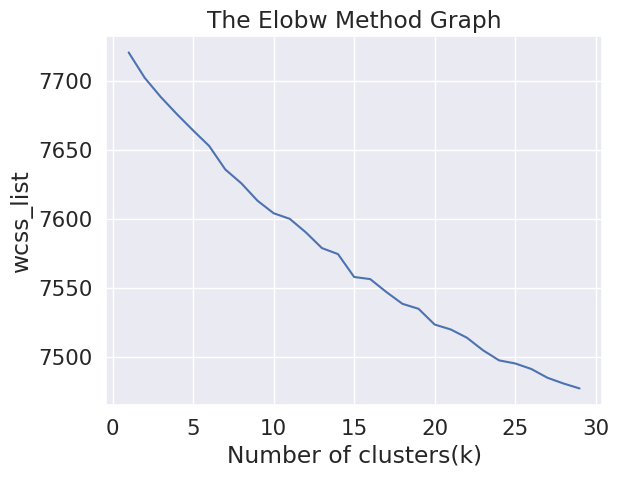

In [ ]:
#finding optimal number of clusters using the elbow method
from sklearn.cluster import KMeans
wcss_list= []  #Initializing the list for the values of WCSS

#Using for loop for iterations from 1 to 30.
for i in range(1, 30):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state= 42)
    kmeans.fit(X)
    wcss_list.append(kmeans.inertia_)
plt.plot(range(1, 30), wcss_list)
plt.title('The Elobw Method Graph')
plt.xlabel('Number of clusters(k)')
plt.ylabel('wcss_list')

In [ ]:
from sklearn.metrics import silhouette_score
#sillhoute score of clusters
sill = []
for i in range(2,30):
    model = KMeans(n_clusters=i,init ='k-means++',random_state=51)
    model.fit(X)
    y1 = model.predict(X)
    score = silhouette_score(X,y1)
    sill.append(score)
    print('cluster: %d \t Sillhoute: %0.4f'%(i,score))

cluster: 2 	 Sillhoute: 0.0014
cluster: 3 	 Sillhoute: 0.0016
cluster: 4 	 Sillhoute: 0.0021
cluster: 5 	 Sillhoute: 0.0025
cluster: 6 	 Sillhoute: 0.0034
cluster: 7 	 Sillhoute: 0.0037
cluster: 8 	 Sillhoute: 0.0038
cluster: 9 	 Sillhoute: 0.0042
cluster: 10 	 Sillhoute: 0.0045
cluster: 11 	 Sillhoute: 0.0046
cluster: 12 	 Sillhoute: 0.0048
cluster: 13 	 Sillhoute: 0.0051
cluster: 14 	 Sillhoute: 0.0056
cluster: 15 	 Sillhoute: 0.0061
cluster: 16 	 Sillhoute: 0.0063
cluster: 17 	 Sillhoute: 0.0064
cluster: 18 	 Sillhoute: 0.0062
cluster: 19 	 Sillhoute: 0.0063
cluster: 20 	 Sillhoute: 0.0069
cluster: 21 	 Sillhoute: 0.0067
cluster: 22 	 Sillhoute: 0.0069
cluster: 23 	 Sillhoute: 0.0068
cluster: 24 	 Sillhoute: 0.0072
cluster: 25 	 Sillhoute: 0.0073
cluster: 26 	 Sillhoute: 0.0071
cluster: 27 	 Sillhoute: 0.0074
cluster: 28 	 Sillhoute: 0.0074
cluster: 29 	 Sillhoute: 0.0072


In [ ]:
#training the K-means model on a dataset
kmeans = KMeans(n_clusters= 26, init='k-means++', random_state= 42)
y_predict= kmeans.fit_predict(X)

In [ ]:
#Predict the clusters and evaluate the silhouette score

score = silhouette_score(X, y_predict)
print("Silhouette score is {}".format(score))

Silhouette score is 0.007218341785521539


In [ ]:
#davies_bouldin_score of our clusters
from sklearn.metrics import davies_bouldin_score
davies_bouldin_score(X, y_predict)

9.193799997853855

In [ ]:
#Adding a seperate column for the cluster
df2["cluster"] = y_predict

In [ ]:
df2['cluster'].value_counts()

cluster
3     2504
2      532
11     331
5      319
18     289
14     284
1      271
7      268
23     234
12     232
10     224
17     223
16     209
8      205
19     192
15     189
21     175
4      158
0      155
24     150
22     140
9      138
20     108
25      89
13      79
6       72
Name: count, dtype: int64

<Axes: xlabel='cluster', ylabel='count'>

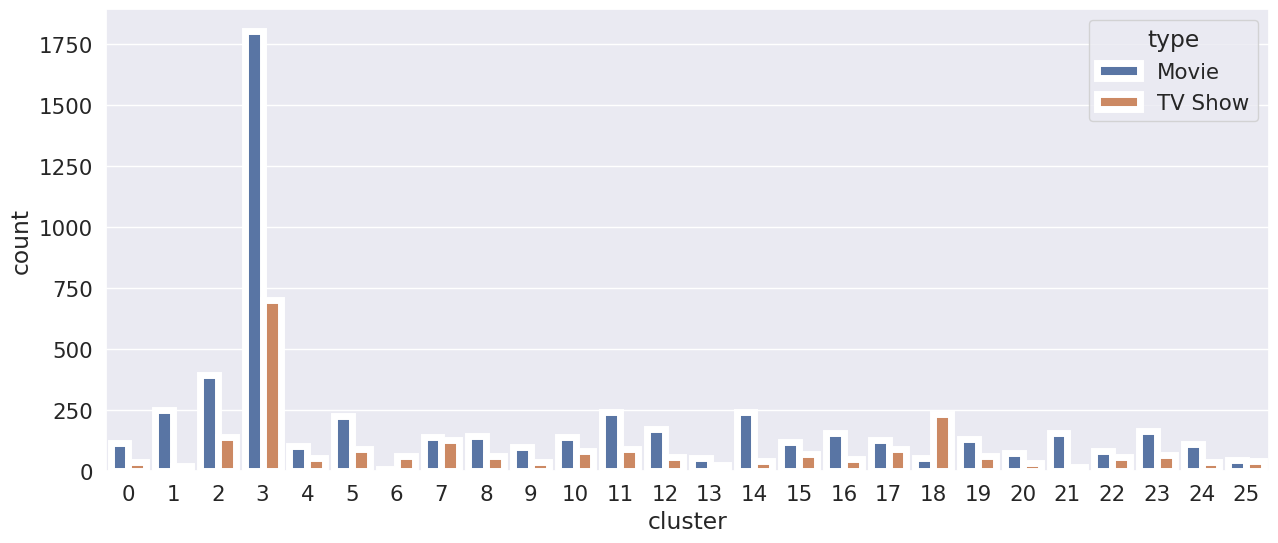

In [ ]:
fig, ax = plt.subplots(figsize=(15,6))
sns.countplot(x='cluster', hue='type',lw=5, data=df2, ax=ax)

In [ ]:
#SCATTER PLOT FOR CLUSTERS
fig = px.scatter(df2, y="description", x="cluster",color="cluster")
fig.update_traces(marker_size=100)
fig.show()

**Dendogram**

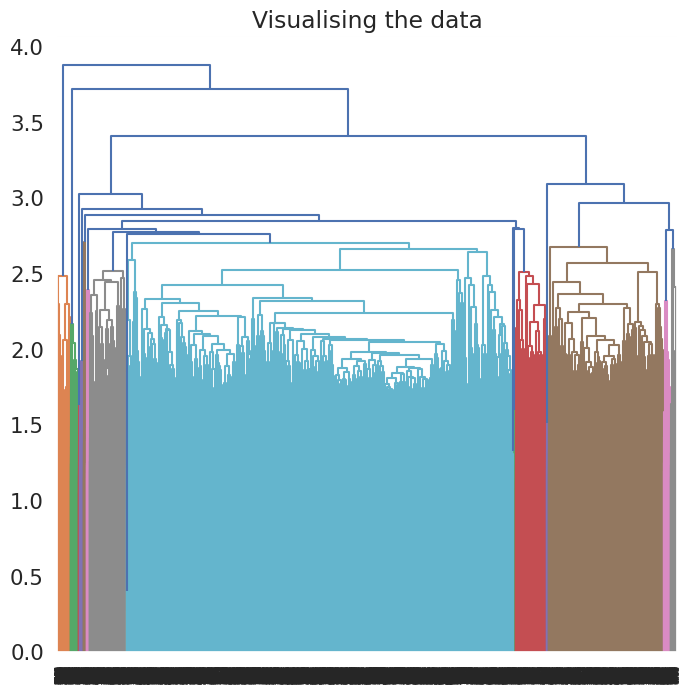

In [ ]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize =(8, 8))
plt.title('Visualising the data')
Dendrogram = shc.dendrogram((shc.linkage(X, method ='ward')))

### ML Model - 2 - Implementing Agglomerative Clustering

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#Fitting our variable in Agglomerative Clusters
from sklearn.cluster import AgglomerativeClustering
aggh = AgglomerativeClustering(n_clusters=6, affinity='euclidean', linkage='ward')
aggh.fit(X)
#Predicting using our model
y_hc=aggh.fit_predict(X)

In [ ]:
df_hierarchical =df.copy()
#creating a column where each row is assigned to their separate cluster
df_hierarchical['cluster'] = aggh.labels_
df_hierarchical.head()

,show_id,type,title,cast,country,date_added,release_year,rating,duration,listed_in,description,cluster
0,s1,TV Show,3%,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,1
1,s2,Movie,7:19,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,1
2,s3,Movie,23:59,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",0
3,s4,Movie,9,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",1
4,s5,Movie,21,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,0


**Evaluation**

In [ ]:
#Silhouette Coefficient
print("Silhouette Coefficient: %0.3f"%silhouette_score(X,y_hc, metric='euclidean'))

Silhouette Coefficient: -0.002


In [ ]:
#davies_bouldin_score of our clusters
from sklearn.metrics import davies_bouldin_score
davies_bouldin_score(X, y_hc)

13.979382092977453

# **Conclusion**


**1.** Based on the elbow and silhouette score, an optimal number of 26 clusters were formed. K-Means proved to be a better method for identification than Hierarchical, as indicated by the evaluation metrics. In the K-Means clustering, cluster 0 contains the highest number of data points and the distribution is fairly even across the other clusters.
**2.** Netflix hosts 5372 movies and 2398 TV shows, indicating a larger number of movies than TV shows on the platform.
**3.** TV-MA, which is an adult rating, has the highest frequency among TV show ratings.
**4.** The years 2017 and 2018 saw the highest number of movie releases.
**5.** The year 2020 witnessed the highest number of movie releases. The growth rate of movies on Netflix is significantly higher than that of TV shows. A substantial increase in the number of movies and television episodes was observed post-2015. However, there was a noticeable decline in the production of movies and television episodes after 2020. It appears that Netflix has prioritized the augmentation of Movie content over TV Shows, as evidenced by the more dramatic increase in the number of movies.
**6.** The most substantial influx of content to Netflix occurs from October through January.
**7.** Documentaries lead the pack as the most prevalent genre on Netflix, followed by stand-up comedy, dramas, and international movies.
**8.** When it comes to TV shows, Kids TV holds the top spot in terms of genre on Netflix.
**9.** The majority of movies on the platform have a duration ranging from 50 to 150 minutes.
**10.** The highest number of TV shows on Netflix consist of just one season.
**11.** Movies with an NC-17 rating tend to have the longest average duration.
**12.** Conversely, movies with a TV-Y rating typically have the shortest average runtime.
**13.** The United States leads in terms of the volume of content available on Netflix, with India following closely behind.
**14.** India has the highest number of movies on Netflix.
**15.** 30% of the movies on Netflix were released directly on the platform.
**16.** Conversely, 70% of the movies added to Netflix had been previously released through different mediums.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***